In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
dados, rotulos = make_blobs(n_samples=200, centers=1, n_features=2, random_state=0, center_box=(10, 10), cluster_std=0.3)
dados[:10]

array([[10.01372756,  9.94384484],
       [ 9.6188545 , 10.29081901],
       [ 9.88453606, 10.02830548],
       [ 9.84710435,  9.86857771],
       [ 9.81157373,  9.85569186],
       [ 9.96903434, 10.12317955],
       [ 9.74163229, 10.57301949],
       [10.01158917,  9.50298547],
       [10.23153717, 10.24705125],
       [10.04648423, 10.11344876]])

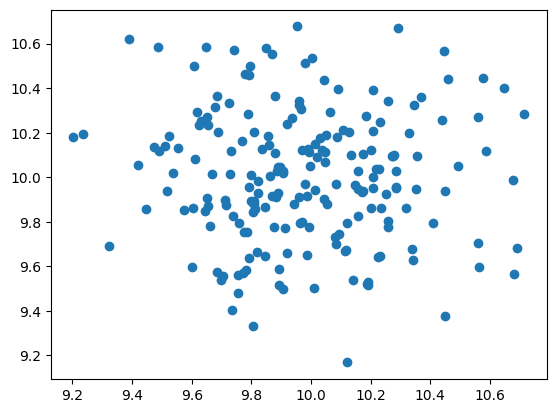

In [3]:
plt.scatter(dados[:,0], dados[:,1])
plt.show()

In [4]:
k_vizinhos = 20
contaminacao = 0.03
lof = LocalOutlierFactor(n_neighbors=k_vizinhos, contamination=contaminacao)

In [5]:
predicao = lof.fit_predict(dados)
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
lof_indice = np.where(predicao==-1)
anomalias = dados[lof_indice]

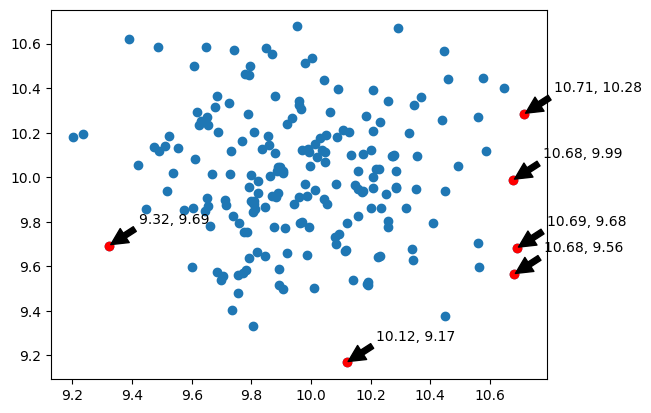

In [7]:
fig, eixo = plt.subplots()
eixo.scatter(dados[:,0], dados[:,1])
eixo.scatter(anomalias[:,0], anomalias[:,1], color='red')

for i, texto in enumerate(anomalias):
    eixo.annotate('{:.2f}'.format(texto[0]) + ', ' + '{:.2f}'.format(texto[1]), xy=(anomalias[i,0], anomalias[i,1]), xytext=(anomalias[i,0]+0.1, anomalias[i,1]+0.1), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [9]:
from sklearn.datasets import fetch_california_housing
import plotly.express as pe

In [10]:
dados_california = fetch_california_housing(as_frame=True)
moradia = dados_california.data
moradia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


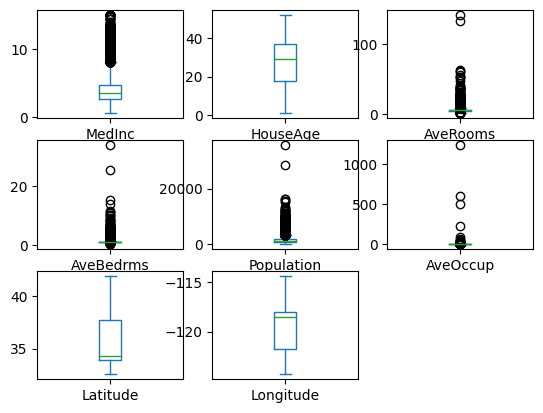

In [11]:
moradia.plot(kind='box', subplots=True, layout=(3,3))
plt.show()

In [16]:
fig_renda = pe.histogram(moradia, x='MedInc', marginal='box')
fig_renda.show()

In [15]:
fig_ambientes = pe.histogram(moradia, x='AveRooms', marginal='box')
fig_ambientes.show()

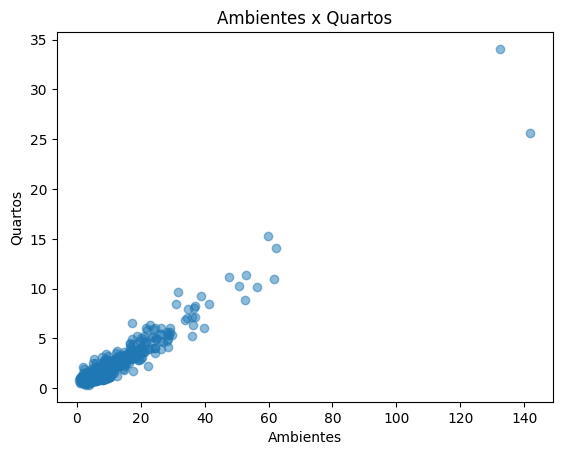

In [19]:
plt.scatter(moradia['AveRooms'], moradia['AveBedrms'], alpha=0.5)
plt.xlabel('Ambientes')
plt.ylabel('Quartos')
plt.title('Ambientes x Quartos')
plt.show()

In [20]:
populacao = moradia['Population']
populacao.head()

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: Population, dtype: float64

In [21]:
quartil1 = moradia['Population'].quantile(0.25)
quartil3 = moradia['Population'].quantile(0.75)
range_interquartil = quartil3 - quartil1
print('Quartil 1: ', quartil1, '\nQuartil 3: ', quartil3, '\nRange interquartil: ', range_interquartil)

Quartil 1:  787.0 
Quartil 3:  1725.0 
Range interquartil:  938.0


In [22]:
sigma = 1.5 # 1.5 é o valor padrão
limite_inferior = quartil1 - sigma * range_interquartil
limite_superior = quartil3 + sigma * range_interquartil
print('Limite inferior: ', limite_inferior, '\nLimite superior: ', limite_superior)

Limite inferior:  -620.0 
Limite superior:  3132.0


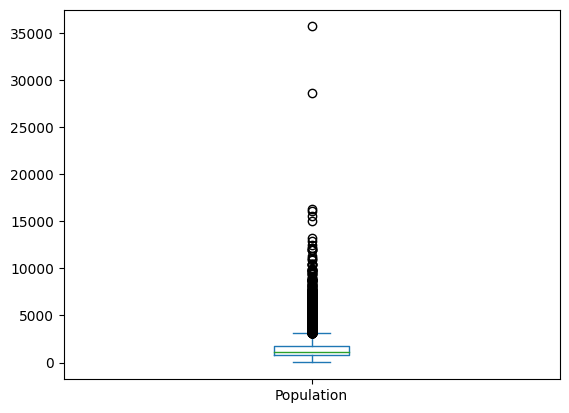

In [24]:
moradia['Population'].plot(kind='box')
plt.show()

In [23]:
fig_populacao = pe.histogram(moradia, x='Population', marginal='box')
fig_populacao.show()

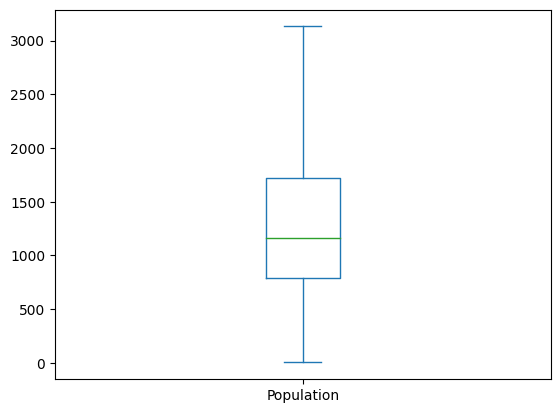

In [25]:
# Removendo outliers
moradia['Population'].plot(kind='box', showfliers=False)
plt.show()

In [30]:
df_Petrobras = pd.read_csv('petr4-nov-19-abr-20.csv', index_col=0, parse_dates=True)
df_Petrobras.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,30.590000,31.230000,29.840000,30.430000,24.232862,101210200
2019-11-04,30.889999,31.219999,29.959999,30.360001,24.177118,81023400
2019-11-05,30.410000,30.600000,29.580000,29.650000,23.611712,92980900
2019-11-06,30.049999,30.700001,28.100000,29.709999,23.659489,154003100
2019-11-07,30.000000,31.070000,29.540001,30.900000,24.607145,96329000


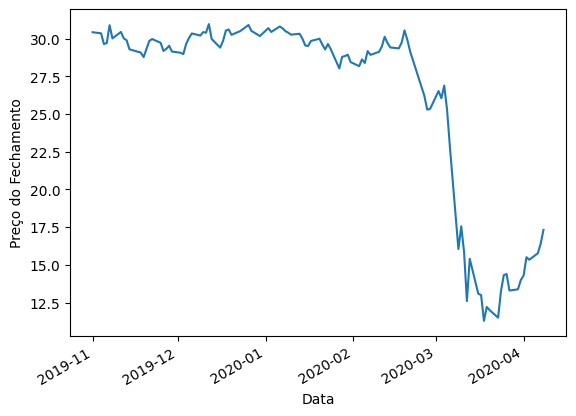

In [31]:
df_Petrobras['Close'].plot()
plt.xlabel('Data')
plt.ylabel('Preço do Fechamento')
plt.show()

In [32]:
df_Petrobras.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2019-11-01 to 2020-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       106 non-null    float64
 1   High       106 non-null    float64
 2   Low        106 non-null    float64
 3   Close      106 non-null    float64
 4   Adj Close  106 non-null    float64
 5   Volume     106 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.8 KB


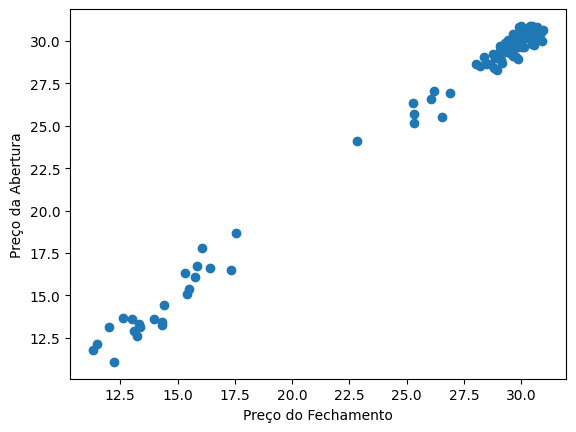

In [33]:
plt.scatter(df_Petrobras['Close'], df_Petrobras['Open'])
plt.xlabel('Preço do Fechamento')
plt.ylabel('Preço da Abertura')
plt.show()

In [34]:
# Usar o algortimo LOF para detectar outliers
k_vizinhos = 20
lof = LocalOutlierFactor(n_neighbors=k_vizinhos)

In [35]:
# Ajustar o modelo aos dados
petrobras_2d = df_Petrobras[['Close', 'Open']]
predicao = lof.fit_predict(petrobras_2d)
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

In [37]:
# Visualizar as anomalias
lof_indice = np.where(predicao==-1)
anomalias = petrobras_2d.iloc[lof_indice]
anomalias

,Close,Open
Date,,
2020-01-27,28.030001,28.629999
2020-02-03,28.180000,28.520000
2020-02-26,26.209999,27.040001
2020-02-27,25.299999,25.719999
2020-02-28,25.340000,25.160000
2020-03-02,26.530001,25.500000
2020-03-03,26.049999,26.570000
2020-03-04,26.889999,26.910000
2020-03-05,25.290001,26.330000


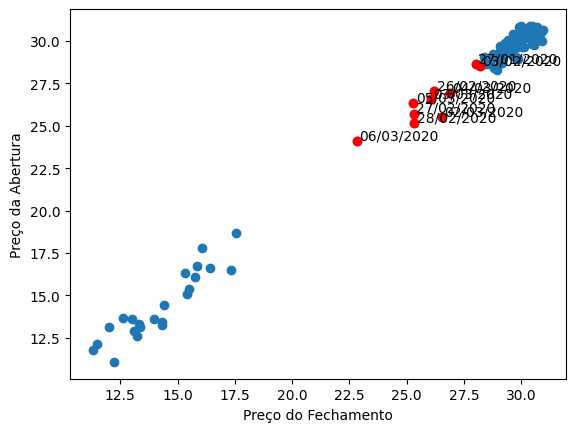

In [42]:
fig, eixo = plt.subplots()

eixo.scatter(petrobras_2d['Close'], petrobras_2d['Open'])
eixo.scatter(anomalias['Close'], anomalias['Open'], color='red')
eixo.set_xlabel('Preço do Fechamento')
eixo.set_ylabel('Preço da Abertura')

data_anomalias = df_Petrobras.index[lof_indice]

for i, texto in enumerate(data_anomalias):
    eixo.annotate(texto.strftime('%d/%m/%Y'), xy=(anomalias.iloc[i,0], anomalias.iloc[i,1]), xytext=(anomalias.iloc[i,0]+0.1, anomalias.iloc[i,1]+0.1))

plt.show()

In [43]:
# Ver data das anomalias
data_anomalias

DatetimeIndex(['2020-01-27', '2020-02-03', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [44]:
# Calcular os limites inferior e superior dos dados
fechamento = df_Petrobras['Close']
abertura = df_Petrobras['Open']
volume = df_Petrobras['Volume']

In [45]:
# Calcular Q1, Q3 e o range interquartil
fechamento_Q1 = fechamento.quantile(0.25)
fechamento_Q3 = fechamento.quantile(0.75)
fechamento_ri = fechamento_Q3 - fechamento_Q1
print('Fechamento Q1: ', fechamento_Q1, '\nFechamento Q3: ', fechamento_Q3, '\nFechamento range interquartil: ', fechamento_ri)

Fechamento Q1:  25.51749975 
Fechamento Q3:  30.04249925 
Fechamento range interquartil:  4.5249995


In [46]:
abertura_Q1 = abertura.quantile(0.25)
abertura_Q3 = abertura.quantile(0.75)
abertura_ri = abertura_Q3 - abertura_Q1
print('Abertura Q1: ', abertura_Q1, '\nAbertura Q3: ', abertura_Q3, '\nAbertura range interquartil: ', abertura_ri)

Abertura Q1:  25.87249925 
Abertura Q3:  30.049999 
Abertura range interquartil:  4.177499749999999


In [47]:
volume_Q1 = volume.quantile(0.25)
volume_Q3 = volume.quantile(0.75)
volume_ri = volume_Q3 - volume_Q1
print('Volume Q1: ', volume_Q1, '\nVolume Q3: ', volume_Q3, '\nVolume range interquartil: ', volume_ri)

Volume Q1:  37563400.0 
Volume Q3:  101356975.0 
Volume range interquartil:  63793575.0


In [48]:
sigma = 1.5 # 1.5 é o valor padrão

In [49]:
fechamento_lim_inf = fechamento_Q1 - sigma * fechamento_ri
fechamento_lim_sup = fechamento_Q3 + sigma * fechamento_ri
print('Fechamento - Limite Inferior: ', fechamento_lim_inf, '\nFechamento - Limite Superior: ', fechamento_lim_sup)

Fechamento - Limite Inferior:  18.7300005 
Fechamento - Limite Superior:  36.8299985


In [50]:
abertura_lim_inf = abertura_Q1 - sigma * abertura_ri
abertura_lim_sup = abertura_Q3 + sigma * abertura_ri
print('Abertura - Limite Inferior: ', abertura_lim_inf, '\nAbertura - Limite Superior: ', abertura_lim_sup)

Abertura - Limite Inferior:  19.606249625000004 
Abertura - Limite Superior:  36.316248625


In [51]:
volume_lim_inf = volume_Q1 - sigma * volume_ri
volume_lim_sup = volume_Q3 + sigma * volume_ri
print('Volume - Limite Inferior: ', volume_lim_inf, '\nVolume - Limite Superior: ', volume_lim_sup)

Volume - Limite Inferior:  -58126962.5 
Volume - Limite Superior:  197047337.5


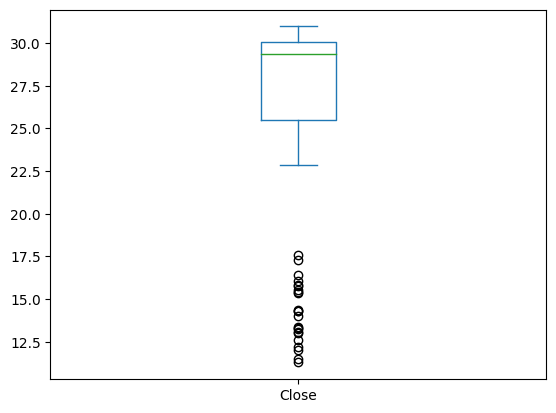

In [53]:
df_Petrobras['Close'].plot(kind='box')
plt.show()

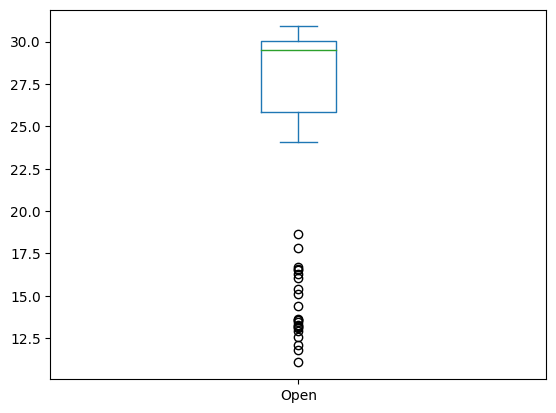

In [54]:
df_Petrobras['Open'].plot(kind='box')
plt.show()

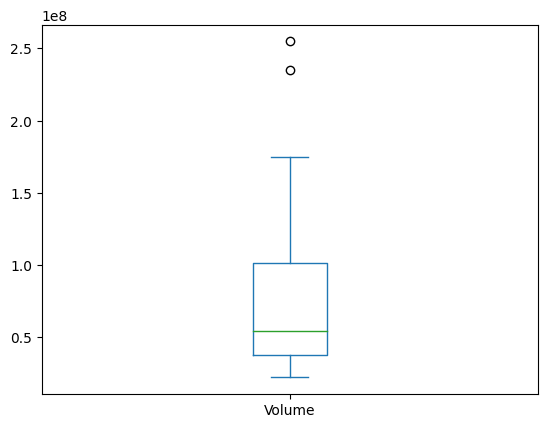

In [55]:
df_Petrobras['Volume'].plot(kind='box')
plt.show()